In [4]:
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import matplotlib.ticker as ticker

In [6]:
data=pd.read_csv('adhdata.csv')

In [7]:
data.head()

Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  ...  \
0  261.0  402.0   16.0  261.0  126.0  384.0  126.0  236.0   52.0  236.0  ...   
1  121.0  191.0  -94.0   85.0   16.0  200.0  126.0   52.0  347.0  273.0  ...   
2  -55.0   85.0 -204.0   15.0  -57.0  200.0   52.0  126.0  236.0  200.0  ...   
3  191.0   85.0   52.0   50.0   89.0  236.0  163.0   89.0   89.0   89.0  ...   
4  -55.0 -125.0 -204.0 -160.0 -204.0   16.0 -241.0 -241.0   89.0   16.0  ...   

      F8     T7     T8     P7     P8     Fz     Cz     Pz  Class    ID  
0   16.0  200.0  494.0  126.0  236.0  121.0  367.0  121.0   ADHD  v10p  
1  -57.0  126.0  347.0   52.0   52.0   15.0  121.0  -19.0   ADHD  v10p  
2  -94.0  126.0  420.0   52.0  126.0  -55.0  261.0   85.0   ADHD  v10p  
3  -57.0  236.0  420.0  126.0  126.0   15.0   85.0  -55.0   ADHD  v10p  
4 -131.0   89.0  310.0  -57.0   52.0  -55.0   15.0 -336.0   ADHD  v10p  

[5 rows x 21 columns]

## The 19 channels are the frequency bands of 19 different brain positions 

Fp1: Left frontal pole

Fp2: Right frontal pole

F7 (T3): Left anterior temporal region

F3: Left frontal region

Fz: Midline frontal region

F4: Right frontal region

F8 (T4): Right anterior temporal region

T3 (T7): Left mid-temporal region

C3: Left central region

Cz: Midline central region

C4: Right central region

T4 (T8): Right mid-temporal region

T5 (P7): Left posterior temporal region

P3: Left parietal region

Pz: Midline parietal region

P4: Right parietal region

T6 (P8): Right posterior temporal region

O1: Left occipital region

O2: Right occipital region

## the last two columns are the 
the class column has two values either adhd or control 
the ID colummn  is a sequential number to keep track of the time-order of EEG samples.

over here 
EEG data has a sampling rate of 128 Hz:
That means 128 rows = 1 second of EEG data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166383 entries, 0 to 2166382
Data columns (total 21 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Fp1     float64
 1   Fp2     float64
 2   F3      float64
 3   F4      float64
 4   C3      float64
 5   C4      float64
 6   P3      float64
 7   P4      float64
 8   O1      float64
 9   O2      float64
 10  F7      float64
 11  F8      float64
 12  T7      float64
 13  T8      float64
 14  P7      float64
 15  P8      float64
 16  Fz      float64
 17  Cz      float64
 18  Pz      float64
 19  Class   object 
 20  ID      object 
dtypes: float64(19), object(2)
memory usage: 347.1+ MB


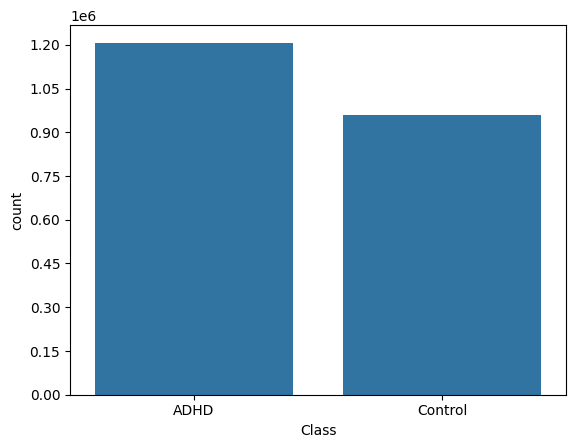

In [12]:
ax = sns.countplot(x='Class', data=data)
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()
#count (frequency) of each class label in the dataset

In [13]:
data['ID'].unique()
# IDs of the participants of this experiment 

array(['v10p', 'v12p', 'v14p', 'v15p', 'v173', 'v18p', 'v19p', 'v1p',
       'v20p', 'v21p', 'v22p', 'v24p', 'v25p', 'v27p', 'v28p', 'v29p',
       'v30p', 'v31p', 'v32p', 'v33p', 'v34p', 'v35p', 'v36p', 'v37p',
       'v38p', 'v39p', 'v3p', 'v40p', 'v6p', 'v8p', 'v177', 'v179',
       'v181', 'v183', 'v190', 'v196', 'v198', 'v200', 'v204', 'v206',
       'v209', 'v213', 'v215', 'v219', 'v227', 'v231', 'v234', 'v236',
       'v238', 'v244', 'v246', 'v250', 'v254', 'v263', 'v265', 'v270',
       'v274', 'v279', 'v284', 'v286', 'v288', 'v107', 'v108', 'v109',
       'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v41p',
       'v42p', 'v43p', 'v44p', 'v45p', 'v46p', 'v47p', 'v48p', 'v49p',
       'v50p', 'v51p', 'v52p', 'v53p', 'v54p', 'v55p', 'v56p', 'v57p',
       'v58p', 'v59p', 'v60p', 'v117', 'v118', 'v120', 'v121', 'v123',
       'v125', 'v127', 'v129', 'v131', 'v133', 'v134', 'v138', 'v140',
       'v143', 'v147', 'v149', 'v151', 'v297', 'v298', 'v299', 'v300',
       'v3

In [14]:
data['ID'].value_counts()

ID
v15p    43252
v244    39030
v20p    35328
v234    34191
v3p     33570
        ...  
v25p     9894
v238     9852
v46p     9823
v37p     9286
v51p     7983
Name: count, Length: 121, dtype: int64

In [16]:
data[data['Class']=="ADHD"]['ID'].value_counts()
# there are 61 participants with ADHD and 60 without 

ID
v15p    43252
v244    39030
v20p    35328
v234    34191
v3p     33570
        ...  
v181    10668
v254    10477
v25p     9894
v238     9852
v37p     9286
Name: count, Length: 61, dtype: int64

In [17]:
data.columns.tolist()

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'Class',
 'ID']

In [18]:
channel_names = data.columns.tolist()
channel_names.remove('Class')
channel_names.remove('ID')
# now the channel_names includes only those columns which will be useful for us 

In [19]:
'''EEG data is recorded as voltage signals 
sampled at a certain rate. Here, sfreq = 128 
means the EEG signal is sampled 128 times 
per second. This is important because it tells
us the time resolution of the data'''
sfreq = 128

'''This creates an MNE Info object, which 
is a metadata container used by the MNE library to 
describe the properties of the EEG data.'''
info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types='eeg')


print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 128.0 Hz
>


bads: []
This is a list of channels marked as "bad" (noisy or faulty). Here, it's empty, so no bad channels are flagged.

ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
The list of EEG channel names. These correspond to electrode locations on the scalp according to the standard EEG system (10-20 system).

chs: 19 EEG
Indicates that there are 19 channels, and all of them are EEG channels (electrodes measuring brain electrical activity).

custom_ref_applied: False
Whether a custom reference electrode has been applied. EEG data is often referenced to a particular electrode or average of electrodes. Here, no custom referencing has been done.

highpass: 0.0 Hz
The high-pass filter cutoff frequency applied to the data. 0.0 Hz means no high-pass filtering yet (no filtering of slow drifts below 0 Hz).

lowpass: 64.0 Hz
The low-pass filter cutoff frequency. This means frequencies above 64 Hz have been filtered out or are expected to be removed during processing. This helps remove high-frequency noise.

In [20]:
'''This creates a montage object representing 
the spatial arrangement (positions) of EEG 
electrodes on the scalp based on the 
internationally recognized 10-20 system. 
The 10-20 system is a standard naming and placement 
convention for EEG electrodes on the head.'''

montage = mne.channels.make_standard_montage('standard_1020')

'''This attaches the montage 
(electrode position info) to our MNE info object, 
which describes our dataset's channels.'''
info.set_montage(montage)

print(info)# the info is updated now 

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 128.0 Hz
>


By setting the montage, you tell MNE where each electrode physically lies on the scalp. This lets you visualize EEG data topographically (e.g., scalp maps, head plots) showing activity across different brain regions.

## new attribute in the info 'dig'
dig stands for digitization points.

It contains a list of 3D coordinates that describe specific points on the subject's head and the exact locations of the EEG electrodes (channels).

In your case, it has 22 items:

3 Cardinal points: These are standard anatomical reference points on the head, often the nasion (bridge of nose) and left/right preauricular points (just in front of the ears). They help define the coordinate system for electrode locations.

19 EEG points: These correspond to the positions of your 19 EEG electrodes on the scalp, as per the 10-20 montage.

In [21]:
patient = data[data.ID == 'v10p']

In [22]:
# Convert DataFrame to NumPy array
eeg_adhd_data = patient.drop(['Class','ID'], axis=1)
eeg_adhd_data = eeg_adhd_data.values.T  # Transpose to have channels as rows and samples as columns

# Create RawArray object with EEG data and MNE info
raw_adhd = mne.io.RawArray(eeg_adhd_data, info)


print(raw_adhd)

Creating RawArray with float64 data, n_channels=19, n_times=14304
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
<RawArray | 19 x 14304 (111.7 s), ~2.1 MB, data loaded>


Attempting to create new mne-python configuration file:
C:\Users\deeks\.mne\mne-python.json
Using matplotlib as 2D backend.


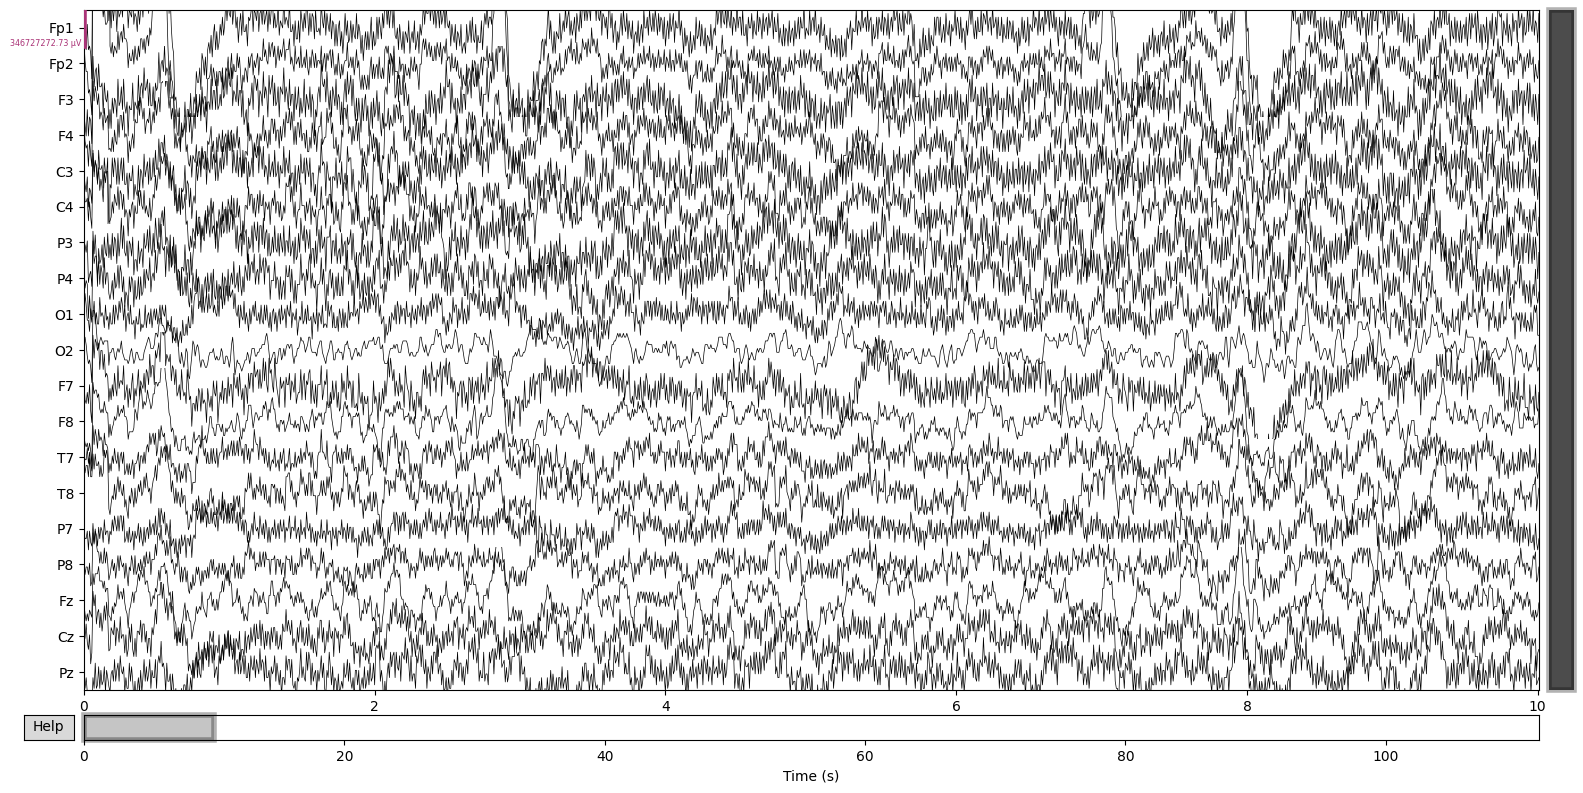

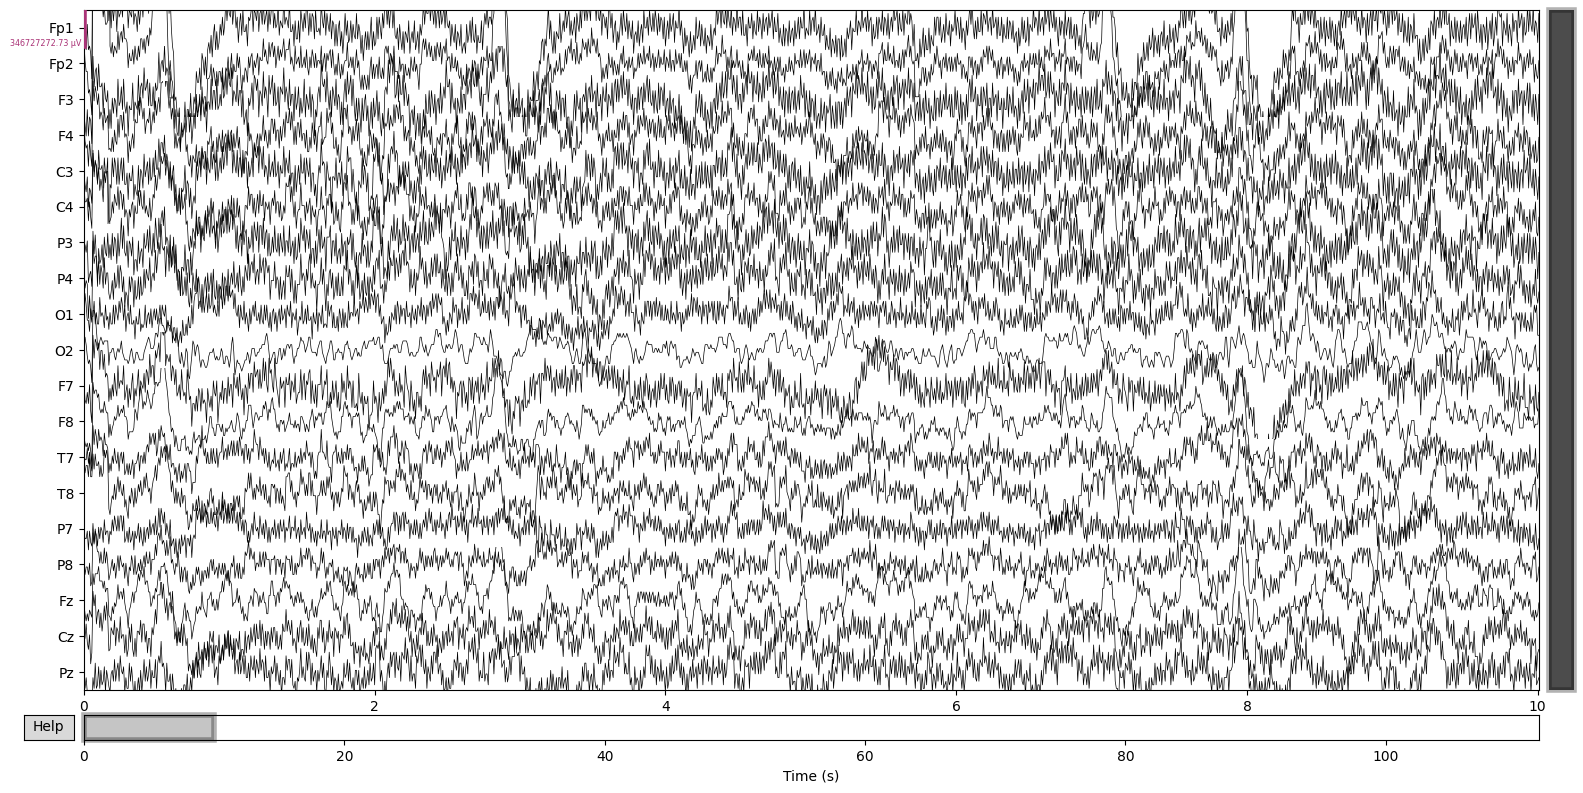

In [23]:
mne.set_config('MNE_BROWSE_RAW_SIZE','16,8')  
raw_adhd.plot(n_channels=len(channel_names), scalings='auto', title='Raw EEG Data')

## Bandpass Filtering

Bandpass filtering is a signal processing technique that allows frequencies within a certain range (band) to pass through, while attenuating (reducing) frequencies outside that range.

For EEG signals, this helps to:

Remove unwanted low-frequency noise (like drift or slow artifacts).

Remove high-frequency noise (like muscle activity, electrical noise).

By focusing on a specific frequency band relevant to brain activity (e.g., 4–40 Hz), you enhance the signal quality for analysis.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


C:\Users\deeks\anaconda3\envs\eeg_env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\deeks\AppData\Local\Temp\ipykernel_27456\3367373498.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


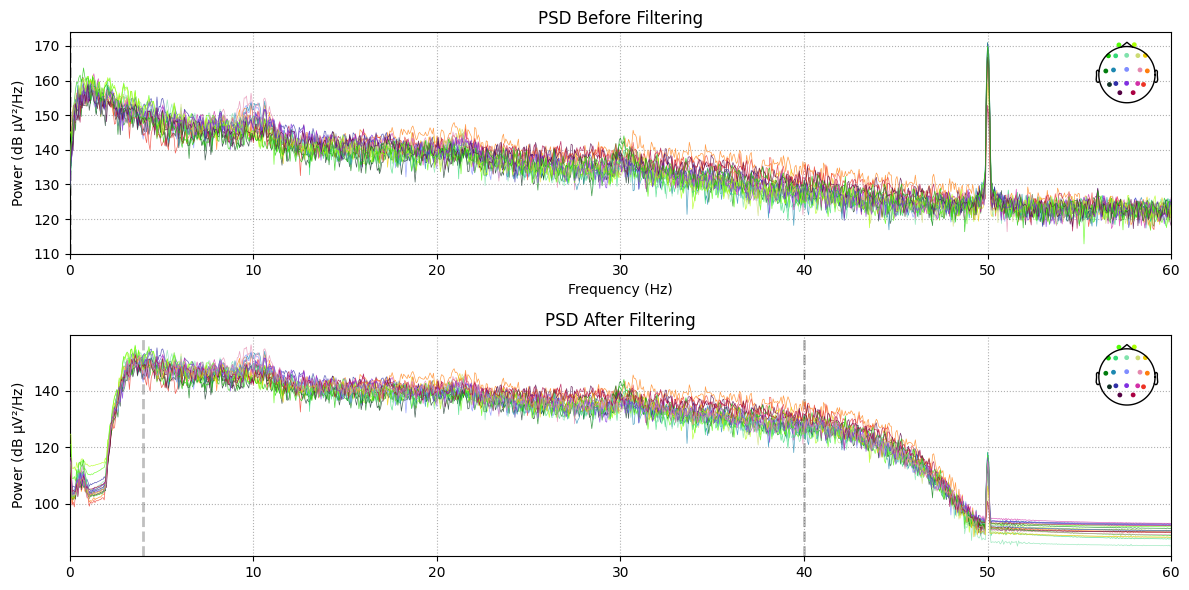

In [28]:
# Apply bandpass filter (4-40 Hz)
raw_adhd_filtered = raw_adhd.copy().filter(l_freq=4, h_freq=40, method='fir', verbose=False)


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))

# PSD Before Filtering
ax1 = fig.add_subplot(2, 1, 1)
raw_adhd.plot_psd(fmax=60, ax=ax1)  
ax1.set_title('PSD Before Filtering')

# PSD After Filtering
ax2 = fig.add_subplot(2, 1, 2)
raw_adhd_filtered.plot_psd(fmax=60, ax=ax2)  
ax2.set_title('PSD After Filtering')

plt.tight_layout()
plt.show()

PSD (Power Spectral Density) shows how the power of the signal is distributed over different frequencies.

The code plots two PSD graphs:

Before filtering: shows the original frequency power spectrum.

After filtering: shows the frequency power spectrum after keeping only 4-40 Hz.

## ICA (Indepent Component Analysis)

ICA (Independent Component Analysis)

ICA is a computational method used to separate a multivariate signal (like EEG) into independent, non-overlapping components.

🧠 In EEG, ICA is especially useful for identifying and removing artifacts, such as:

Eye blinks

Eye movements (EOG)

Muscle noise

Heartbeats (ECG)

In [30]:
from mne.preprocessing import ICA

# Initialize ICA
ica_adhd = ICA(n_components=19, random_state=42)

# Fit ICA to the preprocessed data
ica_adhd.fit(raw_adhd_filtered)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 15.2s.


<ICA | raw data decomposition, method: fastica (fit in 35 iterations on 14304 samples), 19 ICA components (19 PCA components available), channel types: eeg, no sources marked for exclusion>

In [31]:
eog_inds, scores = ica_adhd.find_bads_eog(raw_adhd_filtered, ch_name=['Fp1','Fp2','F7','F8'], threshold=3)
print(eog_inds)

Using EOG channels: Fp1, Fp2, F7, F8
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

[np.int64(1)]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


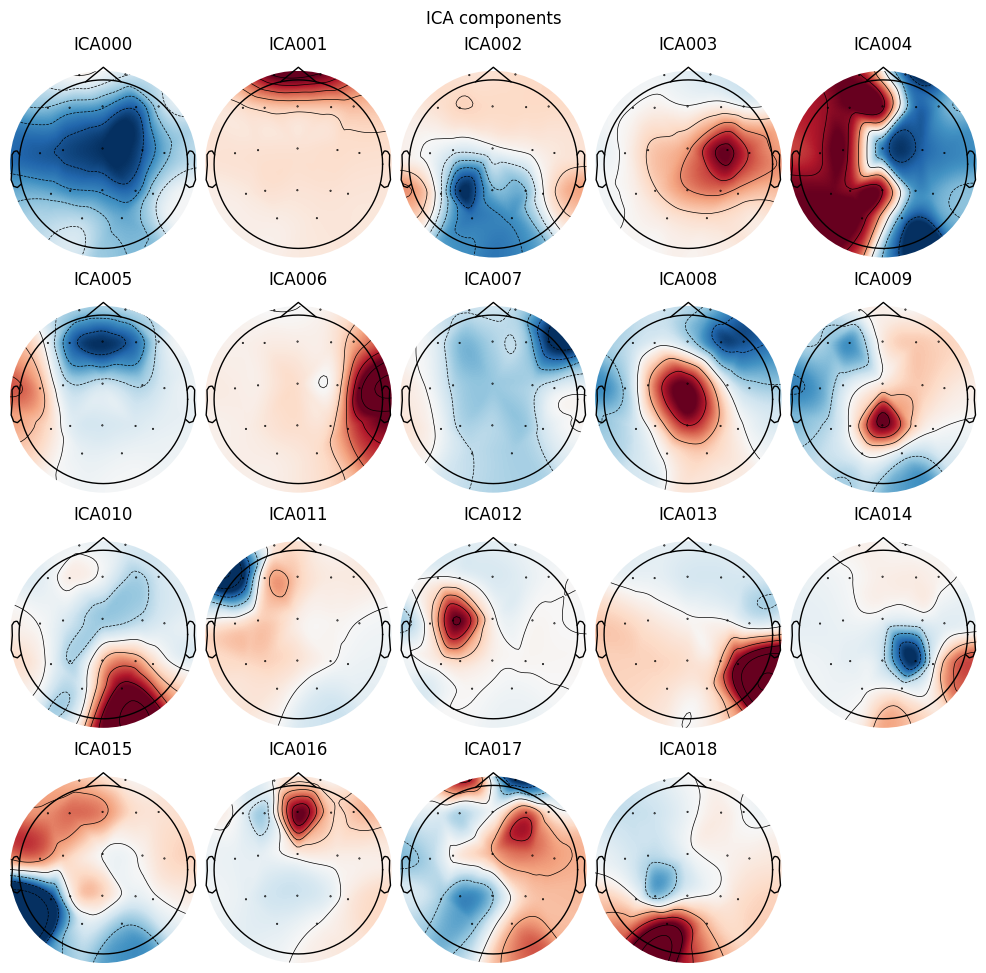

Creating RawArray with float64 data, n_channels=19, n_times=14304
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.


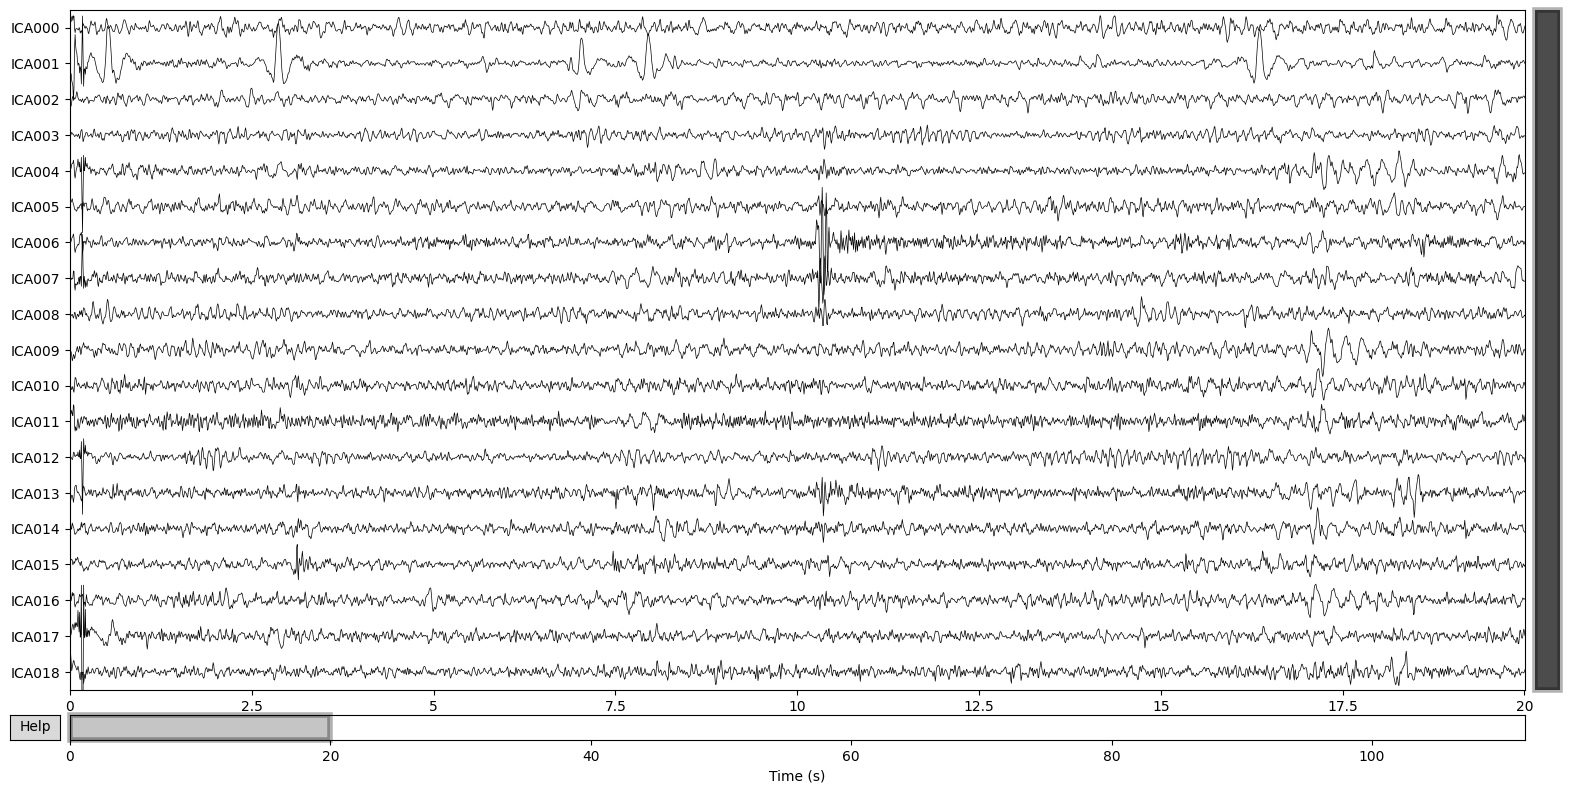

<Figure size 640x480 with 0 Axes>

In [32]:
ica_adhd.plot_components()

# Plot ICA components in waveform
ica_adhd.plot_sources(raw_adhd_filtered)
plt.set_cmap('viridis')  
plt.show()

In [33]:
# Exclude identified components from the ICA decomposition
ica_adhd.exclude = [6,10,14,16]

# Apply ICA to remove ocular artifacts
cleaned_raw_adhd = raw_adhd_filtered.copy()
cleaned_eeg_adhd = ica_adhd.apply(cleaned_raw_adhd)

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 4 ICA components
    Projecting back using 19 PCA components


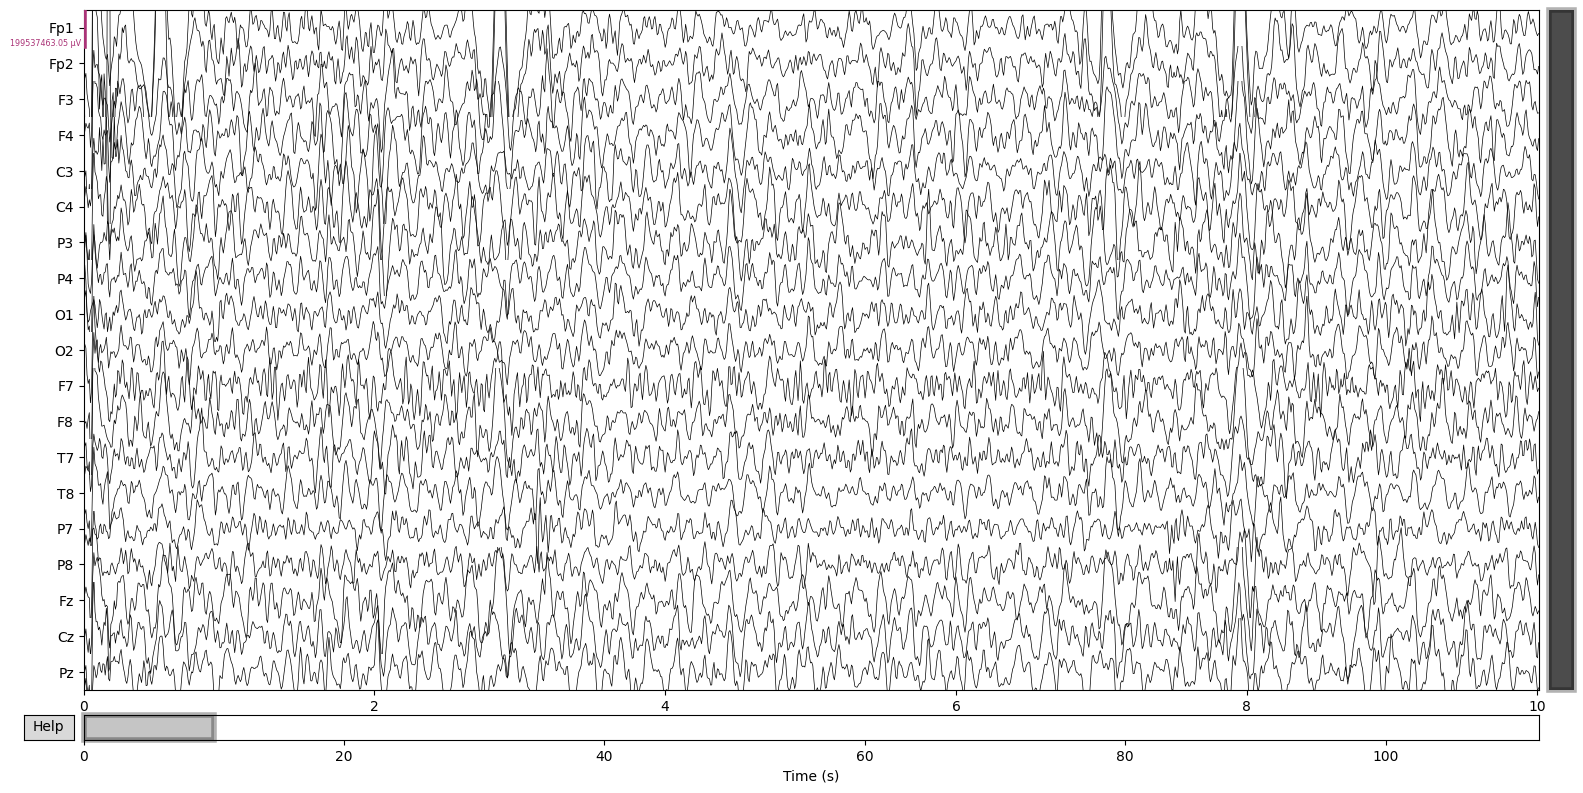

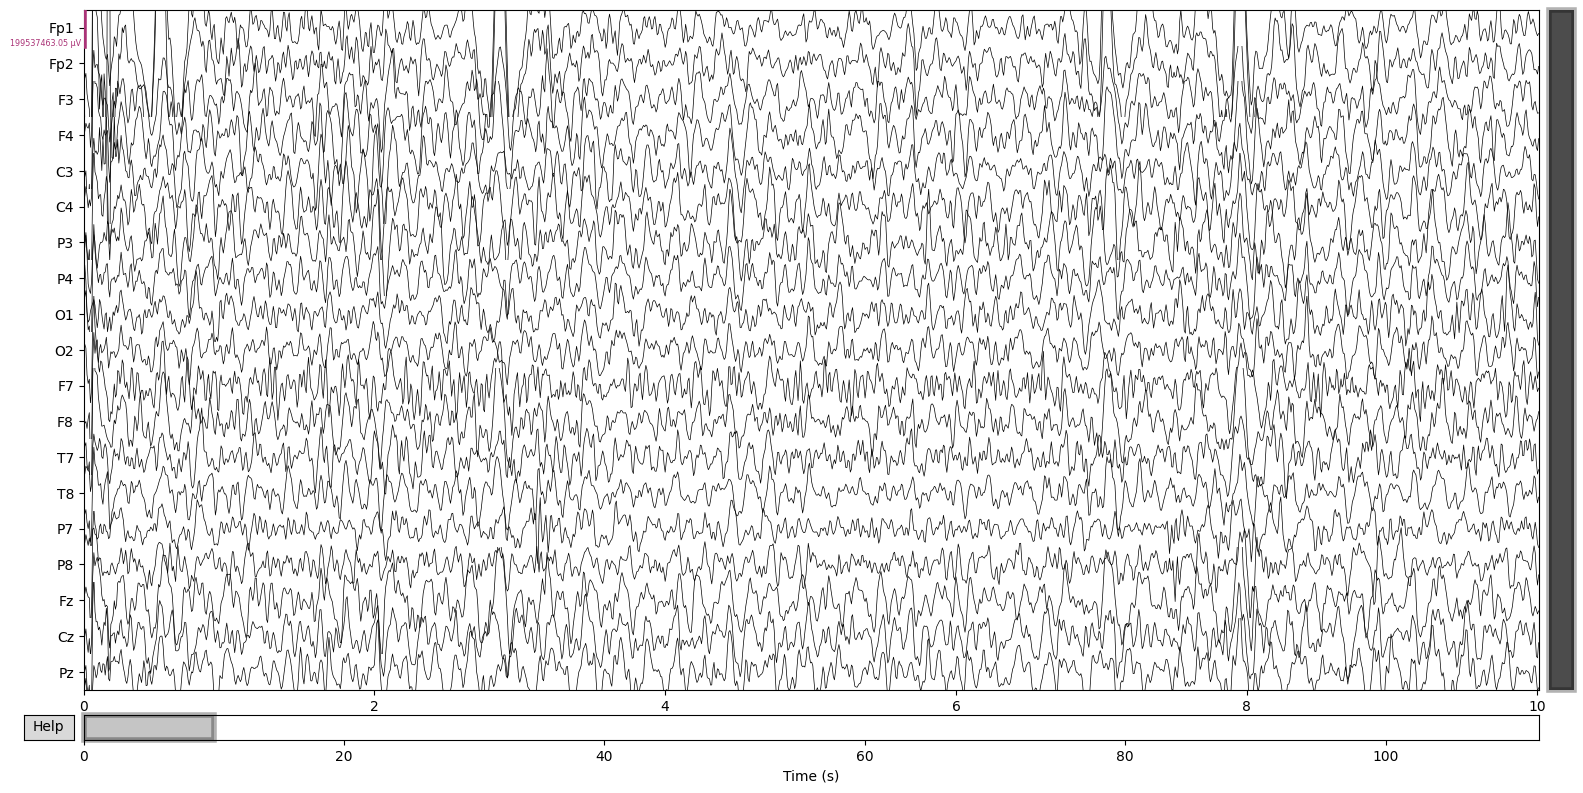

In [34]:
cleaned_eeg_adhd.plot(scalings='auto')

In [35]:
eeg_adhd = cleaned_eeg_adhd.get_data()
eeg_adhd_df = pd.DataFrame(eeg_adhd.T, columns = channel_names, index=None)

In [36]:
eeg_adhd_df.head()

Fp1         Fp2          F3          F4          C3          C4  \
0   -0.001297   -0.000489    0.002098   -0.004131    0.003174    0.001686   
1 -282.487023 -310.565123 -180.611259 -233.415922 -143.340309 -201.540976   
2 -255.529634 -335.602462 -134.140650 -200.553501  -88.570842 -145.289079   
3 -369.589500 -584.963199 -154.277715 -352.847579 -136.991792 -248.468734   
4 -416.128569 -679.073775 -161.984545 -402.876881 -206.832626 -311.654313   

           P3          P4          O1          O2          F7          F8  \
0    0.006191    0.020958    0.001882   -0.012902    0.002571   -0.009907   
1  -30.678461 -104.455600  272.539474   30.277457 -211.902369 -139.957174   
2   38.276717  -70.557924  184.933431    9.199077 -201.460904 -119.519602   
3  -65.997232 -200.123092   12.311100 -140.855060 -240.008843 -243.046335   
4 -232.942044 -289.516210  -45.397783 -189.165524 -186.701139 -274.741303   

          T7          T8         P7          P8          Fz          Cz  \
0   0.002037   -0.015978   0.002487   -0.012397   -0.016000    0.002133   
1 -94.777455 -120.116896 -79.041980 -163.806458 -202.242000 -194.124724   
2 -50.157621  -93.330049 -33.626961 -125.943124 -159.990292 -164.939443   
3 -61.968372 -164.880984 -65.232041 -160.603344 -241.323867 -280.273235   
4 -75.315069 -199.397254 -93.872677 -181.440854 -291.348446 -327.630814   

           Pz  
0    0.002593  
1  -76.489966  
2  -37.711640  
3 -167.385659  
4 -316.243940